In [72]:
import os
os.getcwd()

'C:\\Users\\dell'

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv("RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [76]:
df.shape

(12316, 32)

# EDA

In [77]:
print(df.columns)

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [78]:
df.columns = df.columns.str.strip()  

In [79]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [80]:
df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour

C:\Users\dell\AppData\Local\Temp\ipykernel_16924\2271878679.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour


In [99]:
df['number_of_vehicles_involved'] = pd.to_numeric(df['number_of_vehicles_involved'], errors='coerce')
df['number_of_casualties'] = pd.to_numeric(df['number_of_casualties'], errors='coerce')
df['hour'] = pd.to_numeric(df['hour'], errors='coerce')

In [81]:
df

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity,hour
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


In [83]:
df.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity,hour
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


# Visualization

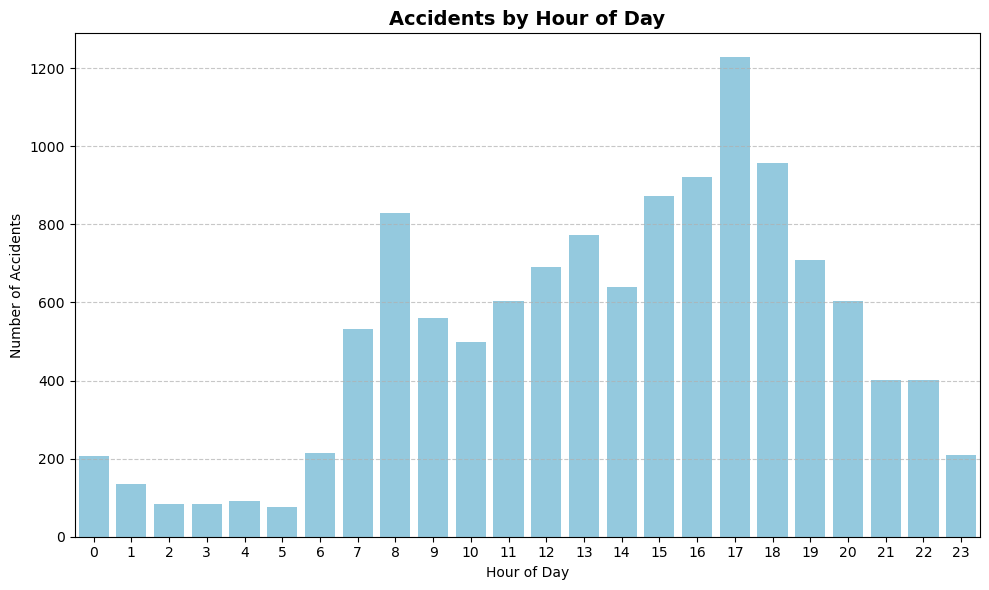

In [84]:
# Accident Count by Hour of the Day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', color='skyblue')
plt.title("Accidents by Hour of Day", fontsize=14, weight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_16924\2772485980.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], palette='Set2')


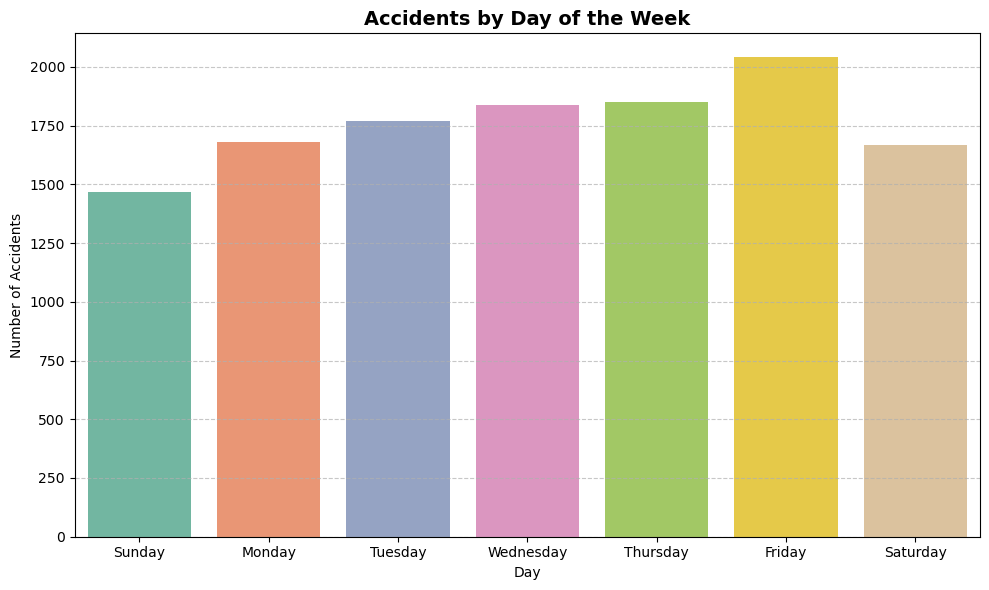

In [85]:
# Accident Count by Day of the Week

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], palette='Set2')
plt.title("Accidents by Day of the Week", fontsize=14, weight='bold')
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_16924\2019798231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='weather_conditions', order=df['weather_conditions'].value_counts().index, palette='coolwarm')


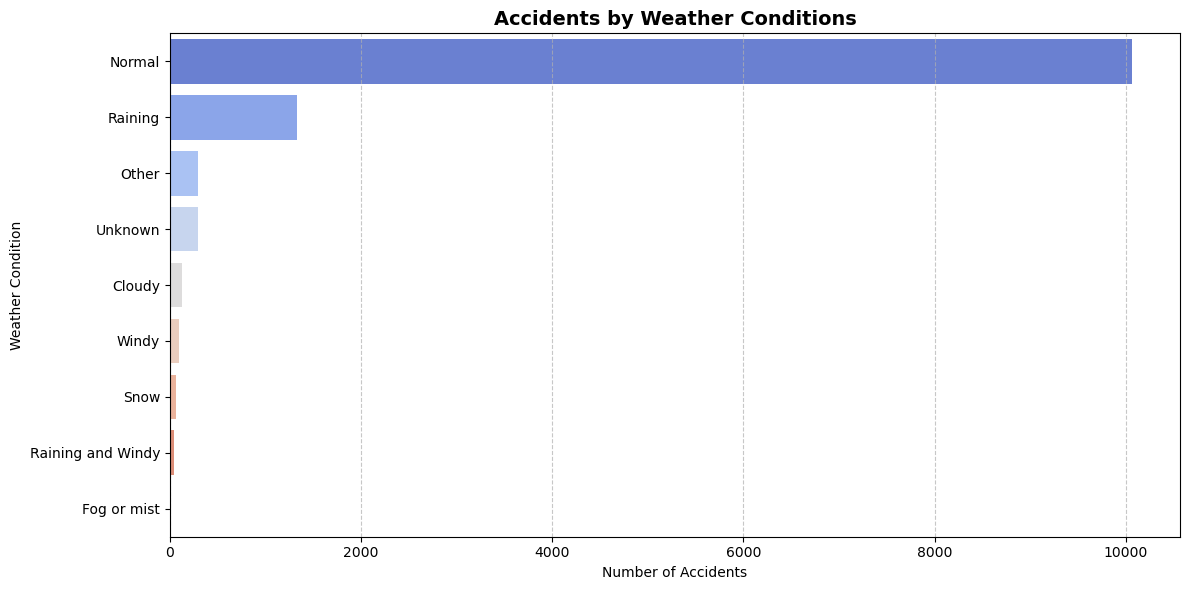

In [86]:
# Accidents by Weather Conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='weather_conditions', order=df['weather_conditions'].value_counts().index, palette='coolwarm')
plt.title("Accidents by Weather Conditions", fontsize=14, weight='bold')
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_16924\3840410525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='light_conditions', order=df['light_conditions'].value_counts().index, palette='pastel')


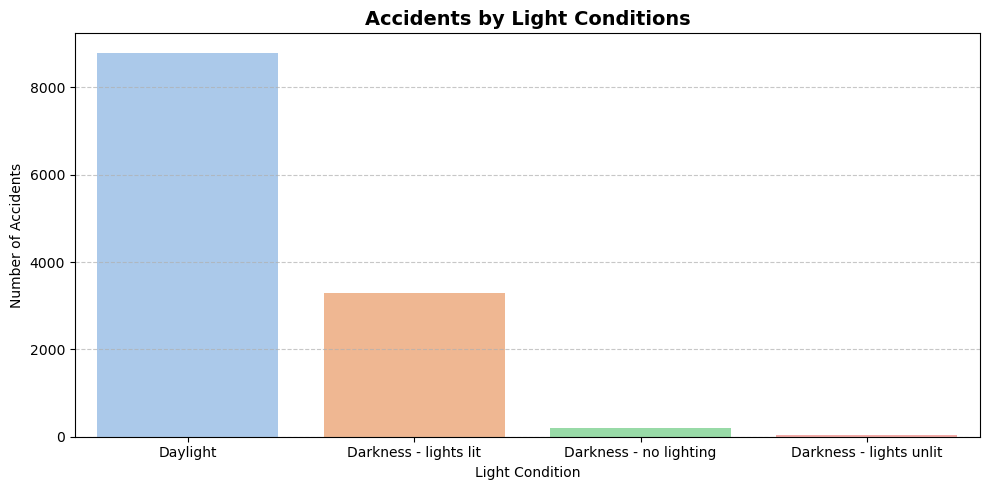

In [87]:
# Accidents by Light Conditions
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='light_conditions', order=df['light_conditions'].value_counts().index, palette='pastel')
plt.title("Accidents by Light Conditions", fontsize=14, weight='bold')
plt.xlabel("Light Condition")
plt.ylabel("Number of Accidents")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

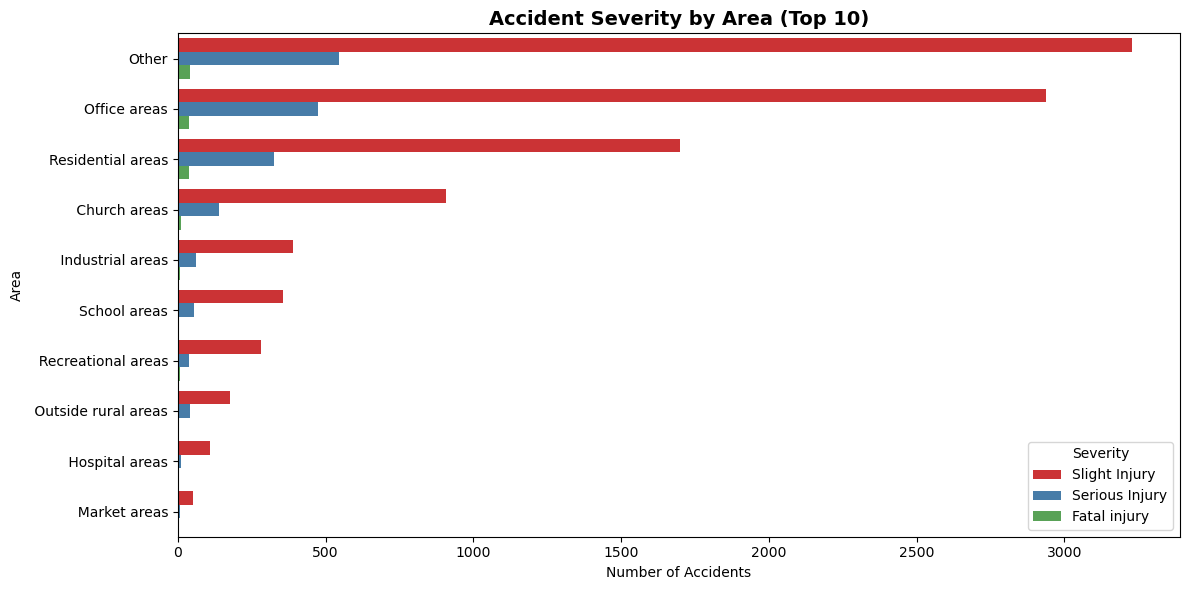

In [88]:
# Accident Severity by Area
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='area_accident_occured', hue='accident_severity', palette='Set1', order=df['area_accident_occured'].value_counts().index[:10])
plt.title("Accident Severity by Area (Top 10)", fontsize=14, weight='bold')
plt.xlabel("Number of Accidents")
plt.ylabel("Area")
plt.legend(title="Severity")
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_16924\4175926204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='cause_of_accident', order=df['cause_of_accident'].value_counts().index[:10], palette='viridis')


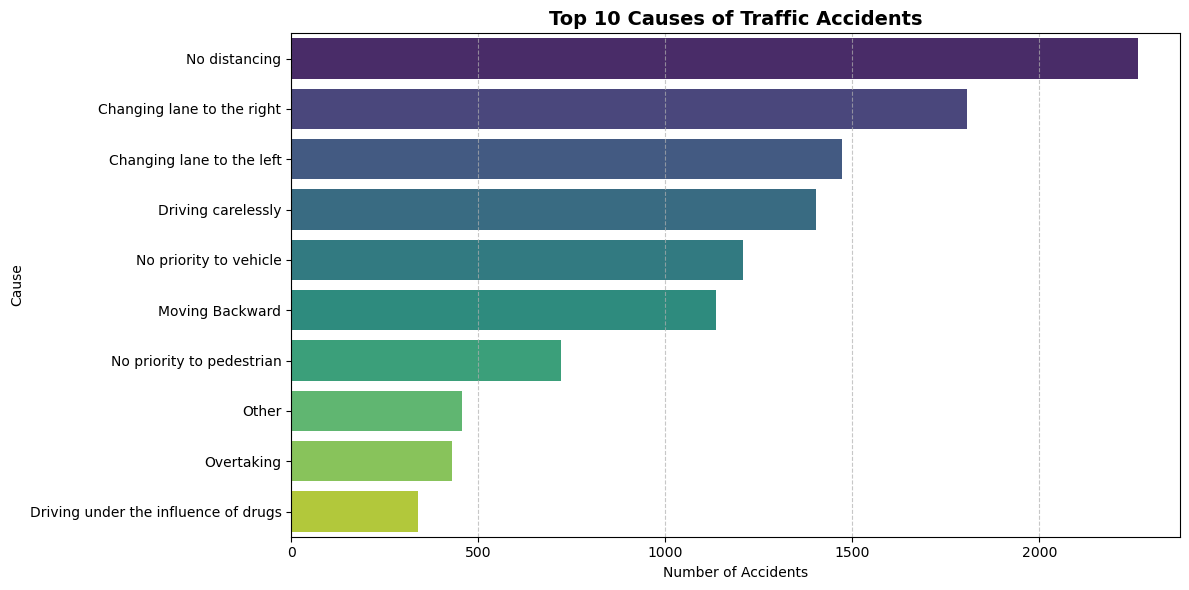

In [89]:
# Top Causes of Accidents
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='cause_of_accident', order=df['cause_of_accident'].value_counts().index[:10], palette='viridis')
plt.title("Top 10 Causes of Traffic Accidents", fontsize=14, weight='bold')
plt.xlabel("Number of Accidents")
plt.ylabel("Cause")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_16924\3743641500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='road_surface_conditions', order=df['road_surface_conditions'].value_counts().index, palette='flare')


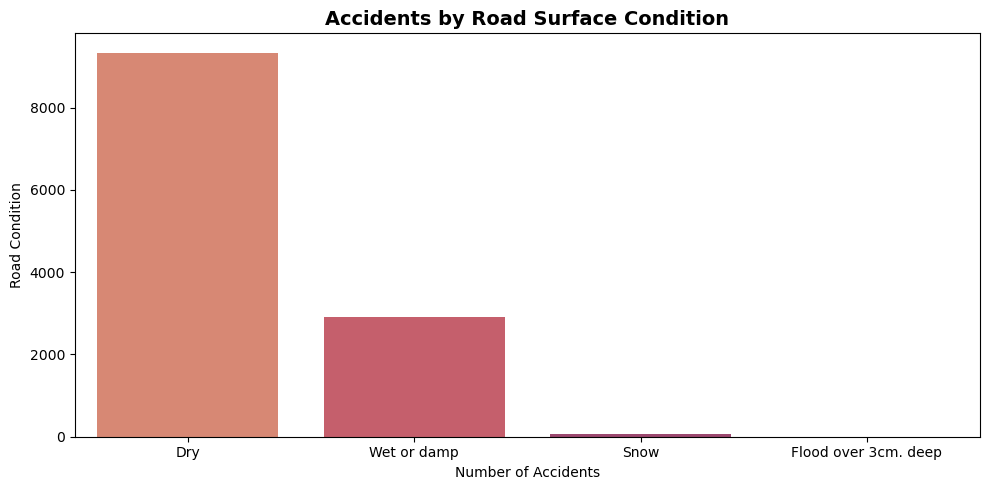

In [90]:
# Road Conditions
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='road_surface_conditions', order=df['road_surface_conditions'].value_counts().index, palette='flare')
plt.title("Accidents by Road Surface Condition", fontsize=14, weight='bold')
plt.xlabel("Number of Accidents")
plt.ylabel("Road Condition")
plt.tight_layout()
plt.show()

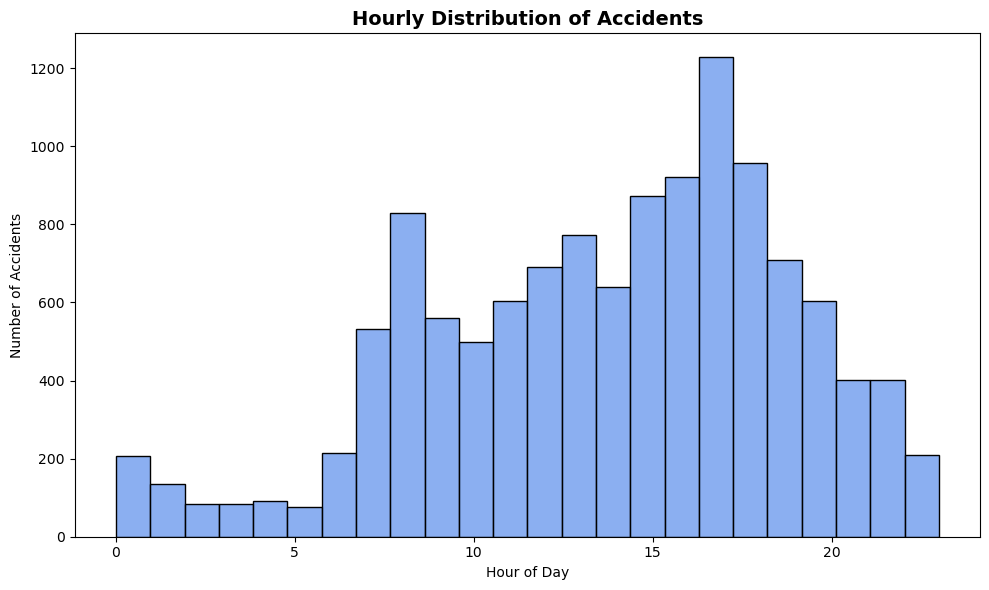

In [91]:
# Time of Day
plt.figure(figsize=(10, 6))
sns.histplot(df['hour'], bins=24, color='cornflowerblue')
plt.title("Hourly Distribution of Accidents", fontsize=14, weight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_16924\3741899340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='area_accident_occured', order=df['area_accident_occured'].value_counts().index[:10], palette='rocket')


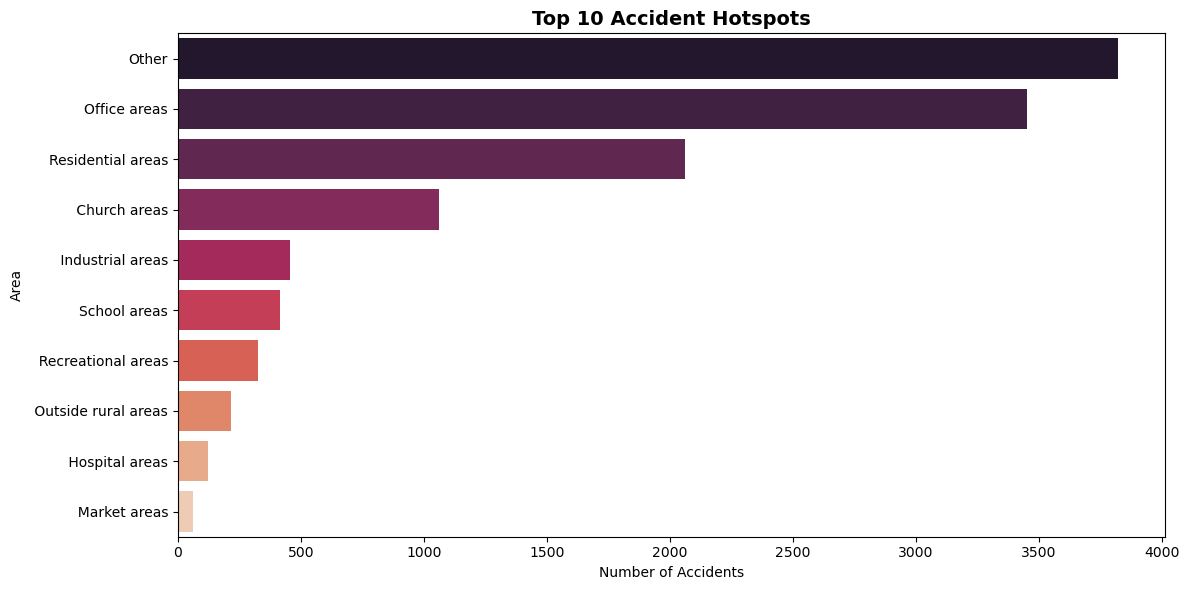

In [92]:
# Accident Hotspots
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='area_accident_occured', order=df['area_accident_occured'].value_counts().index[:10], palette='rocket')
plt.title("Top 10 Accident Hotspots", fontsize=14, weight='bold')
plt.xlabel("Number of Accidents")
plt.ylabel("Area")
plt.tight_layout()
plt.show()

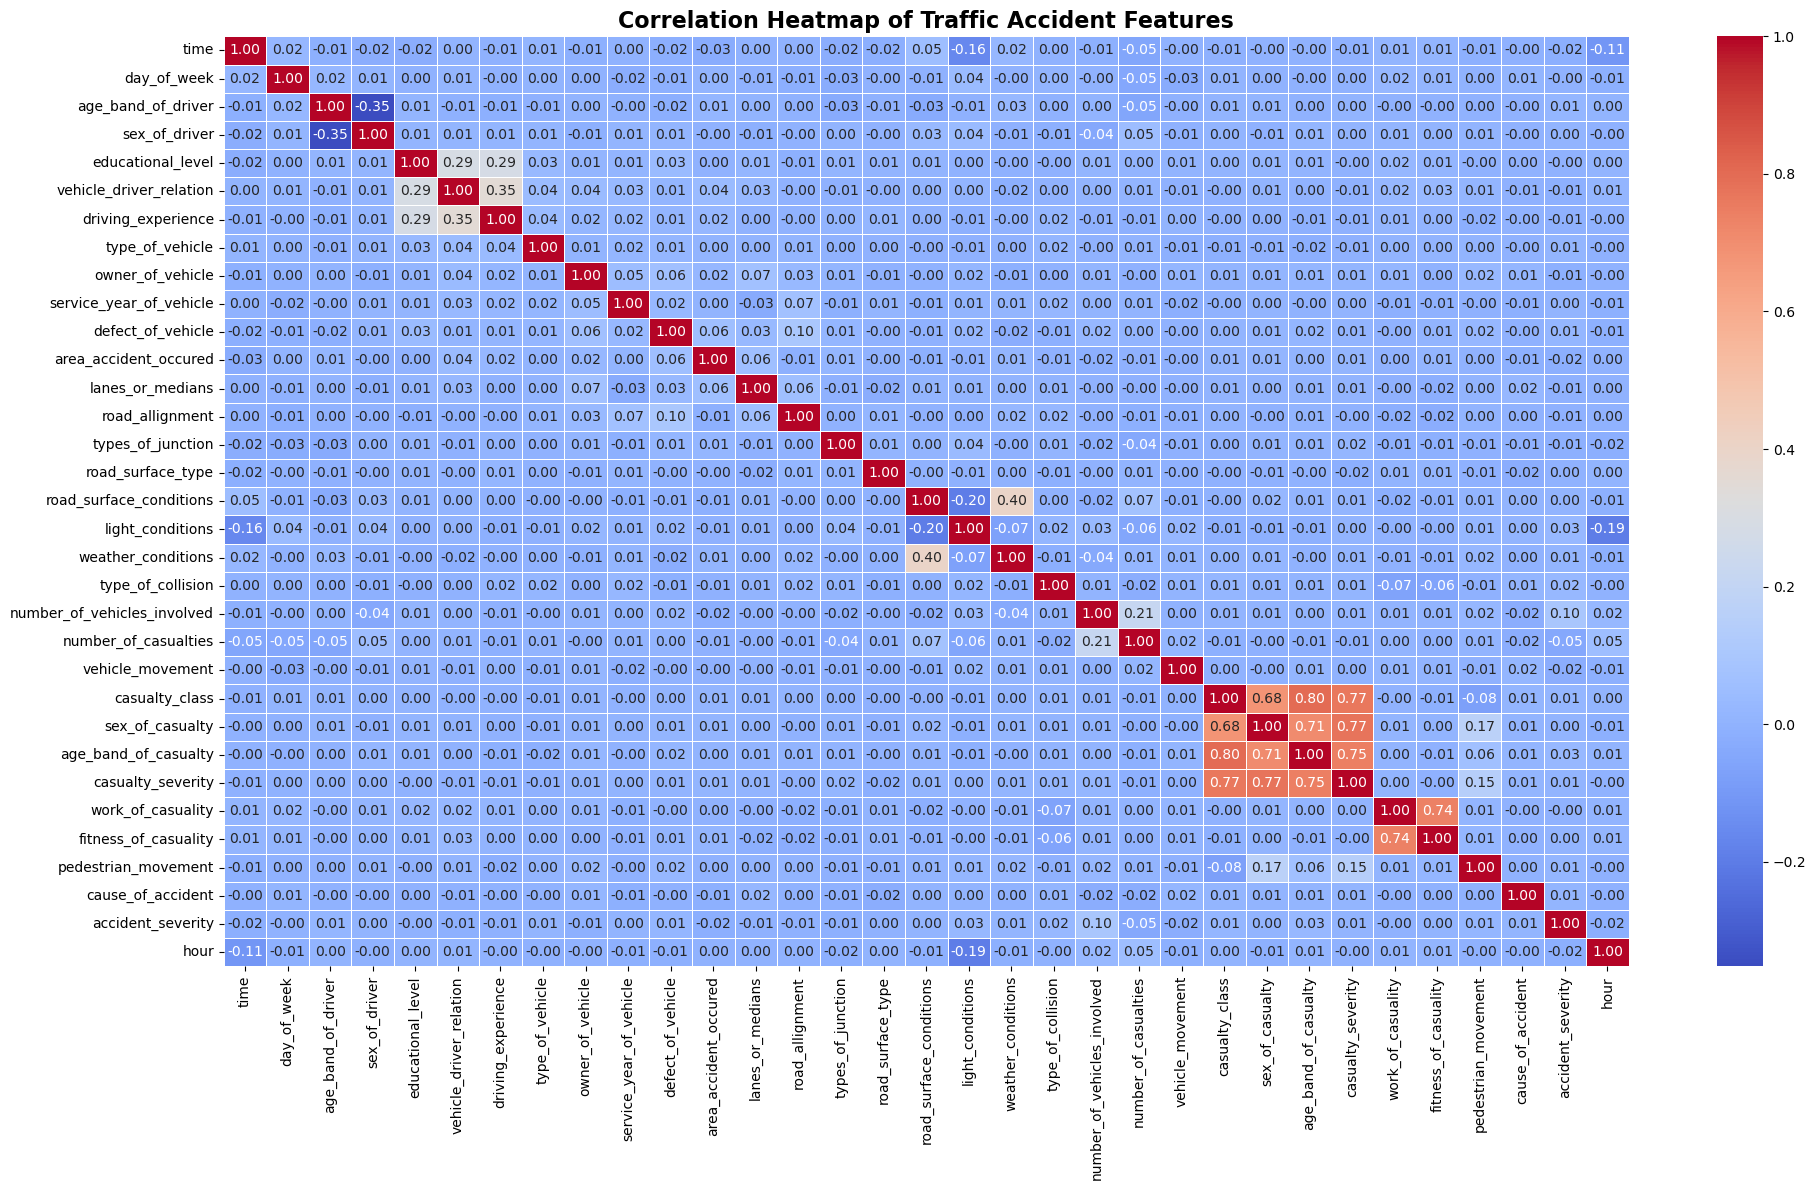

In [97]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Compute correlation matrix
corr_matrix = df_encoded.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Traffic Accident Features", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

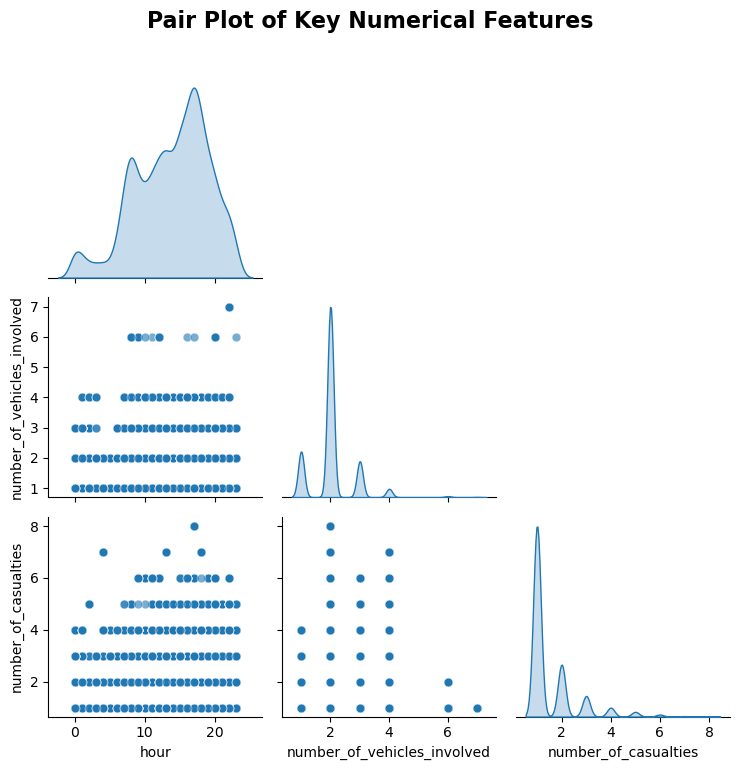

In [98]:
num_cols = ['hour', 'number_of_vehicles_involved', 'number_of_casualties']

sns.pairplot(df[num_cols], corner=True, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 40})
plt.suptitle("Pair Plot of Key Numerical Features", y=1.02, fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# Conclusion:
### Through this comprehensive Exploratory Data Analysis of traffic accident data, several critical patterns were identified. Accidents tend to cluster around rush hours and weekends, highlighting how volume and driver fatigue influence risk. Surprisingly, most incidents occur in clear weather and daylight, emphasizing that visibility alone doesn't ensure safety — driver behavior plays a significant role.

### However, the severity of accidents increases under low-light, foggy, or wet conditions, especially in urban hotspots with poor infrastructure. The leading contributors to accidents were found to be over-speeding, negligence, and violations of basic traffic rules, which are mostly preventable.

### These insights emphasize the importance of targeted enforcement, driver awareness, and urban infrastructure improvements to reduce both accident frequency and fatality rates.

### This project not only sharpened my practical skills in Python, Pandas, Seaborn, Matplotlib, and real-world EDA, but also reinforced how data science can be applied for public safety and impact-driven decisions.